# Choosing a model.
First, running the experiment on linear regression using Scikit Learn's API.

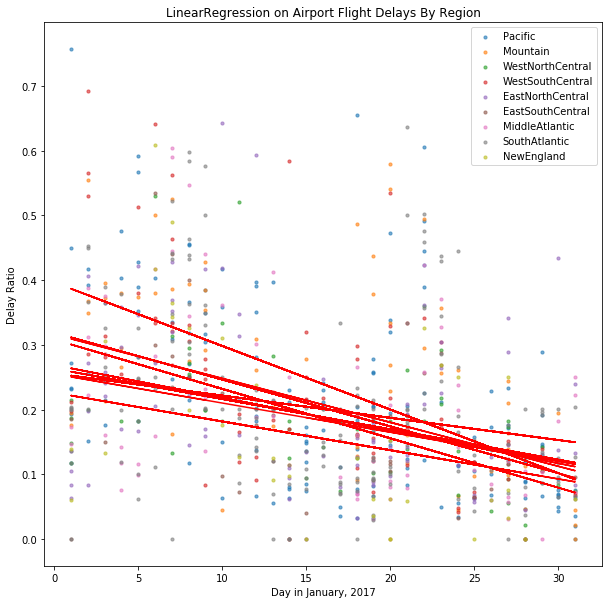

In [1]:
# Linear Regression Model Expiriment
# __Dependancies__
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# __Variables__
cd_data = 'data/'
regions = ['Pacific',
'Mountain',
'WestNorthCentral',
'WestSouthCentral',
'EastNorthCentral',
'EastSouthCentral',
'MiddleAtlantic',
'SouthAtlantic',
'NewEngland']

# Running and plotting the model
plt.figure(figsize=(10,10))
def predict_delays_by_region(regions):
    """
    Linear Regression model that loads in multiple regions
    of data and plots all predicitons on the same plot.
    """
    for region in regions:
        # Load in the data
        X_train = pd.read_csv(cd_data+'X_train_'+region+'.csv')
        X_test = pd.read_csv(cd_data+'X_test_'+region+'.csv')
        y_train = pd.read_csv(cd_data+'y_train_'+region+'.csv')
        y_test = pd.read_csv(cd_data+'y_test_'+region+'.csv')
        # Replace hidden Nan's that may have leaked into the data.
        y_train['DelayRatio'].fillna(np.mean(y_train['DelayRatio']), inplace=True)
        y_test['DelayRatio'].fillna(np.mean(y_test['DelayRatio']), inplace=True)
        # Creating and fitting the model
        lr = LinearRegression()
        lr.fit(X_train[['FlightDate']], y_train)
        y_pred = lr.predict(X_test[['FlightDate']])
        # Plotting the results.
        plt.scatter(X_test['FlightDate'], y_test, label=region, alpha=0.6, s=10)
        plt.plot(X_test[['FlightDate']], y_pred, color='red')
        plt.legend()
    plt.title('LinearRegression on Airport Flight Delays By Region')
    plt.xlabel('Day in January, 2017')
    plt.ylabel('Delay Ratio')
    plt.savefig('figures/LinearRegression_on_all_flight_delay_ratios.png')

# Running the model function.
predict_delays_by_region(regions)


# Next I will try a support vector regression.

/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

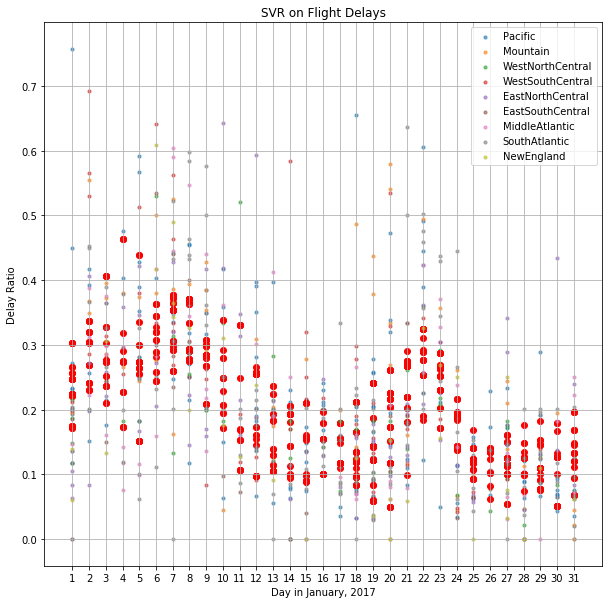

In [2]:
# Support Vecter Machine Expiriment
# __Dependancies__
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
# __Variables__
cd_data = 'data/'
regions = ['Pacific',
'Mountain',
'WestNorthCentral',
'WestSouthCentral',
'EastNorthCentral',
'EastSouthCentral',
'MiddleAtlantic',
'SouthAtlantic',
'NewEngland']
# figure being created outside of loop to ensure there will only be one plot.
plt.figure(figsize=(10,10))
def predict_delays_by_region(regions):
    """
    SVM model that loads in multiple regions
    of data and plots all predicitons on the same plot.
    """
    for region in regions:
        # Load in the data
        X_train = pd.read_csv(cd_data+'X_train_'+region+'.csv')
        X_test = pd.read_csv(cd_data+'X_test_'+region+'.csv')
        y_train = pd.read_csv(cd_data+'y_train_'+region+'.csv')
        y_test = pd.read_csv(cd_data+'y_test_'+region+'.csv')
        # Replace hidden Nan's that may have leaked into the data.
        y_train['DelayRatio'].fillna(np.mean(y_train['DelayRatio']), inplace=True)
        y_test['DelayRatio'].fillna(np.mean(y_test['DelayRatio']), inplace=True)
        # Creating and fitting the model
        model = SVR(kernel='rbf', gamma=0.09, C=0.65)
        model.fit(X_train[['FlightDate']], y_train)
        y_pred = model.predict(X_test[['FlightDate']])
        # Plotting the results.
        plt.scatter(X_test['FlightDate'], y_test, label=region, alpha=0.6, s=10)
        plt.scatter(X_test[['FlightDate']], y_pred, color='red')
        plt.legend()
        plt.grid()
    plt.title('SVR on Flight Delays')
    plt.xlabel('Day in January, 2017')
    plt.ylabel('Delay Ratio')
    plt.xticks(range(1,32))
    plt.savefig('figures/SVR_flightDelay_prediciton.png')
# Running the model function.
predict_delays_by_region(regions)


This is the model I would use for now. However, I am finding a bias in the time constraint.
These flights are affected by seasonal storms. Which means my model will need to be continuously trained on more data for more accurate results.
Here we look at flights only in January 2017, however if we continue to observe flights over several years, I suspect we will build a better prediction model.

For now I will break these up into predictions by region and compute the MSE and MAE.

/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kalen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

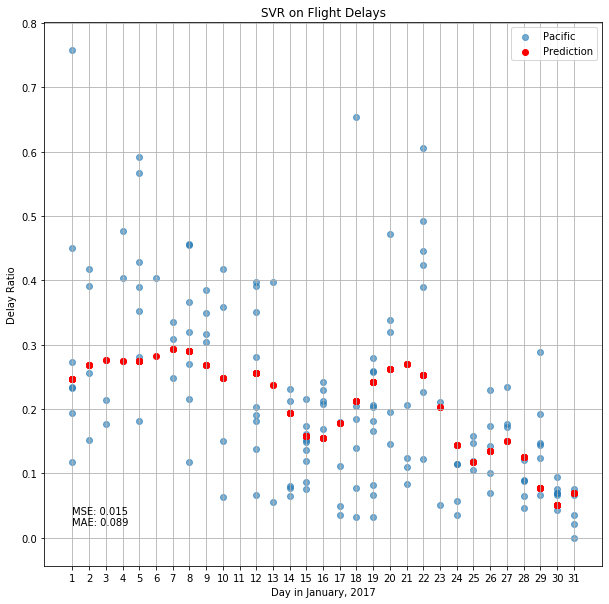

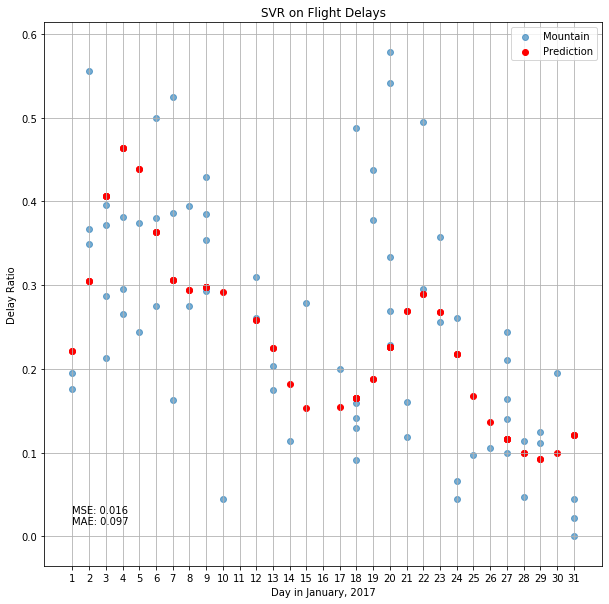

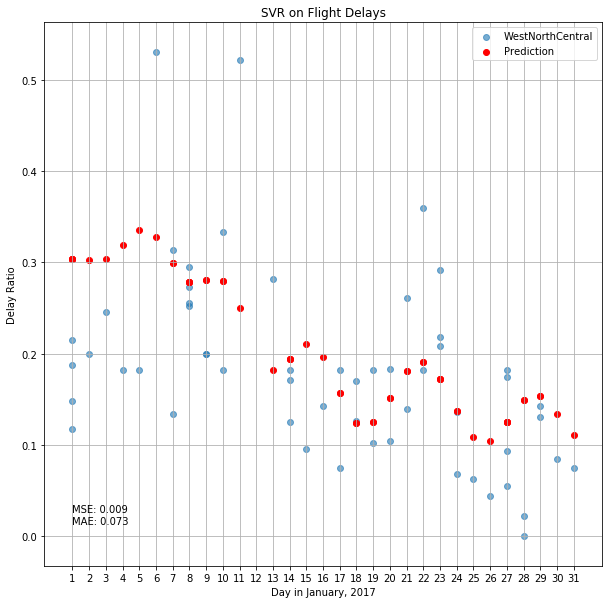

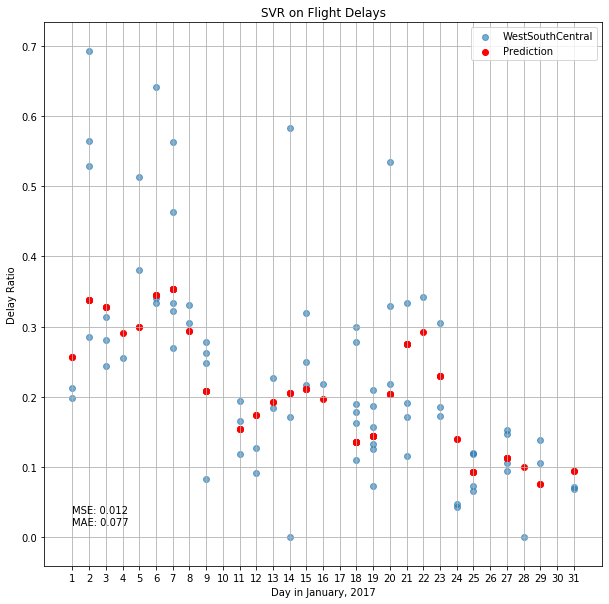

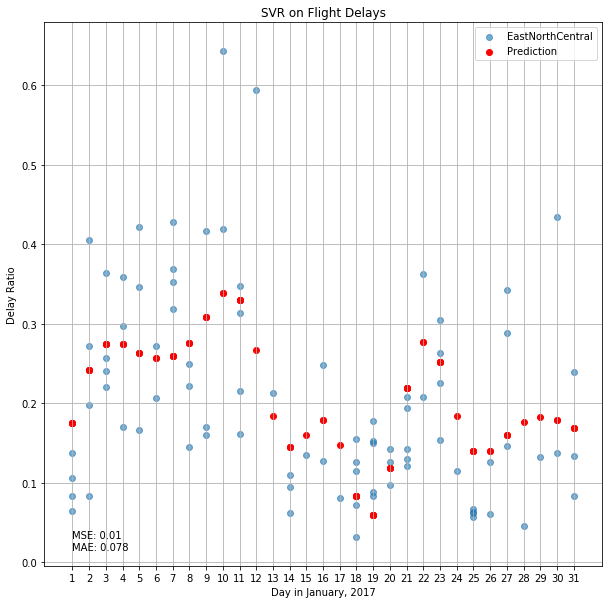

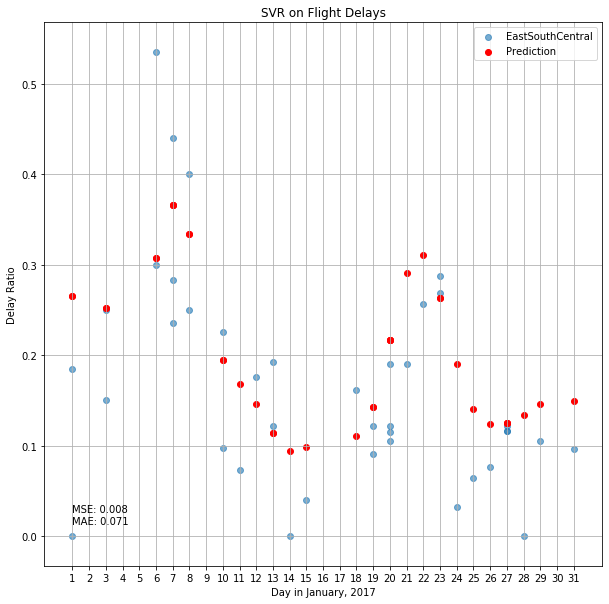

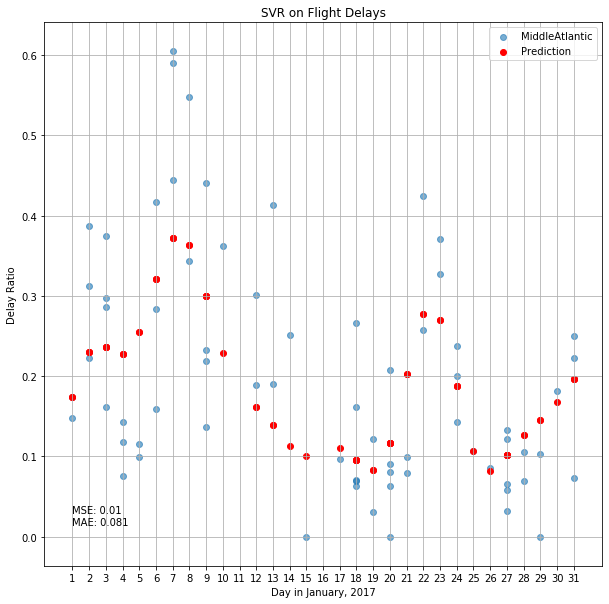

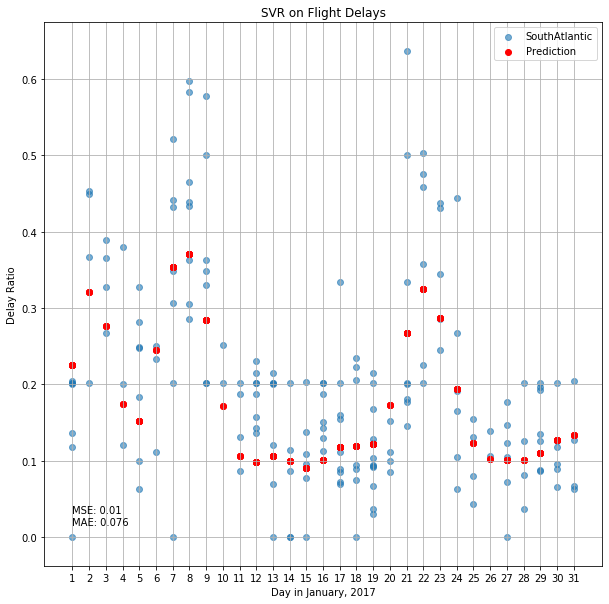

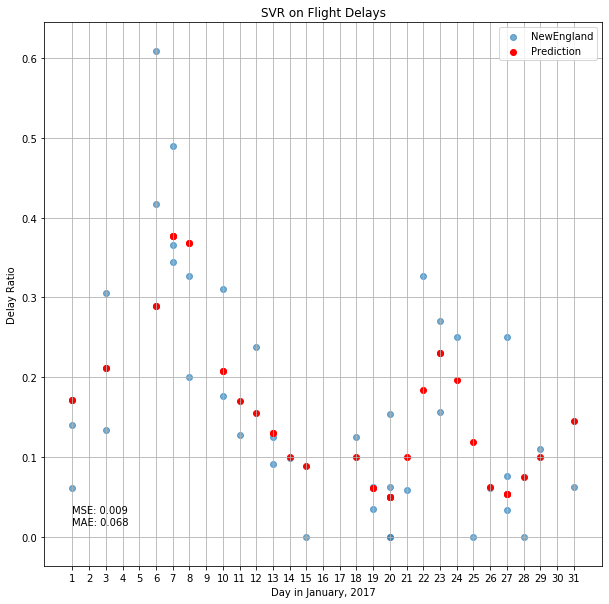

In [3]:
# Support Vecter Machine by region
# __Dependancies__
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
# __Variables__
regions = ['Pacific',
'Mountain',
'WestNorthCentral',
'WestSouthCentral',
'EastNorthCentral',
'EastSouthCentral',
'MiddleAtlantic',
'SouthAtlantic',
'NewEngland']

def predict_delays_by_region(regions):
    """
    SVM model that loads in multiple regions
    of data and plots all predicitons on seperate plots
    by region.
    """
    for region in regions:
        # Load in the data
        X_train = pd.read_csv(cd_data+'X_train_'+region+'.csv')
        X_test = pd.read_csv(cd_data+'X_test_'+region+'.csv')
        y_train = pd.read_csv(cd_data+'y_train_'+region+'.csv')
        y_test = pd.read_csv(cd_data+'y_test_'+region+'.csv')
        # Replace hidden Nan's
        y_train['DelayRatio'].fillna(np.mean(y_train['DelayRatio']), inplace=True)
        y_test['DelayRatio'].fillna(np.mean(y_test['DelayRatio']), inplace=True)
        # Creating and fitting the model
        model = SVR(kernel='rbf', gamma=0.09, C=0.65)
        plt.figure(figsize=(10,10))
        model.fit(X_train[['FlightDate']], y_train)
        y_pred = model.predict(X_test[['FlightDate']])
        # Plotting the results.
        plt.scatter(X_test['FlightDate'], y_test, label=region, alpha=0.6)
        plt.scatter(X_test[['FlightDate']], y_pred, color='red', label='Prediction')
        plt.legend()
        plt.grid()
        plt.text(x=1, y=max(y_test['DelayRatio']/40), s='MSE: '+
        str(round(mean_squared_error(y_test, y_pred), 3))+
        '\nMAE: '+ str(round(mean_absolute_error(y_test, y_pred), 3)))
        plt.title('SVR on Flight Delays')
        plt.xlabel('Day in January, 2017')
        plt.ylabel('Delay Ratio')
        plt.xticks(range(1,32))
        plt.savefig('figures/SVR_on_'+region+'flightDelay_prediciton.png')
# Running the model function.
predict_delays_by_region(regions)
